<a href="https://colab.research.google.com/github/AyeshaAreej/NLPMSCS2-Practce/blob/main/NLPMSCS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the tokenizer models (only needed once)
nltk.download('punkt')

# Define the sentence
sentence = "the cat sat on the mat"

# Tokenize the sentence into words
tokens = word_tokenize(sentence)

# Print the tokens
print(tokens)


['the', 'cat', 'sat', 'on', 'the', 'mat']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
paragraphs = [
    ("This is a great day", "positive"),
    ("This is a bad day", "negative"),
    ("I love the beautiful weather today", "positive"),
    ("I am so happy with my results", "positive"),
    ("The food at this restaurant is amazing", "positive"),
    ("The service was terrible and slow", "negative"),
    ("I hate when my phone battery dies", "negative"),
    ("I feel fantastic after my workout", "positive"),
    ("The traffic jam made me late for work", "negative"),
    ("It was a wonderful experience", "positive"),
    ("I am feeling very sick today", "negative"),
    ("The movie was absolutely brilliant", "positive"),
    ("The flight delay was frustrating", "negative"),
    ("I am so excited for my vacation", "positive"),
    ("The customer service was awful", "negative"),
    ("The view from the mountain was breathtaking", "positive"),
    ("I am disappointed with the product quality", "negative"),
    ("My friends always support me", "positive"),
    ("The noise in the neighborhood is unbearable", "negative"),
    ("I had a fantastic weekend", "positive")
]


In [ ]:
# Code for Positive and Negative Counts
vocabulary = defaultdict(lambda: {"positive": 0, "negative": 0})
for text, label in paragraphs:
  tokens = word_tokenize(text.lower())
  for token in tokens:
    vocabulary[token][label] += 1

# Print the vocabulary in a readable format
print("\nWord Frequency Table:")
print("=" * 30)
print(f"{'Word':<15} {'Positive':<10} {'Negative':<10}")
print("=" * 30)

for word, freq in sorted(vocabulary.items()):
    print(f"{word:<15} {freq['positive']:<10} {freq['negative']:<10}")

print("=" * 30)


Word Frequency Table:
Word            Positive   Negative  
a               3          1         
absolutely      1          0         
after           1          0         
always          1          0         
am              2          2         
amazing         1          0         
and             0          1         
at              1          0         
awful           0          1         
bad             0          1         
battery         0          1         
beautiful       1          0         
breathtaking    1          0         
brilliant       1          0         
customer        0          1         
day             1          1         
delay           0          1         
dies            0          1         
disappointed    0          1         
excited         1          0         
experience      1          0         
fantastic       2          0         
feel            1          0         
feeling         0          1         
flight          0          

In [ ]:
#Feature Extraction Code

# Generate feature vectors for each sentence
print("\nFeature Vectors for Each Sentence:")
print("=" * 50)

feature_vectors = []

for text, _ in paragraphs:
    positive_sum = 0
    negative_sum = 0
    tokens = word_tokenize(text.lower())
    for token in tokens:
        if token in vocabulary:
            positive_sum += vocabulary[token]["positive"]
            negative_sum += vocabulary[token]["negative"]

    feature_vector = [1, positive_sum, negative_sum]
    feature_vectors.append((text, feature_vector))


    print(f"Sentence: {text}")
    print(f"Feature Vector: {feature_vector}")
    print("-" * 50)





# Debugging: Print sentiment sums for all text data
print(f"\nTotal Positive Score: {positive_sum}")
print(f"Total Negative Score: {negative_sum}")

# Debugging: Print feature vector
print(f"\nFeature Vector: {feature_vector}")


Feature Vectors for Each Sentence:
Sentence: This is a great day
Feature Vector: [1, 9, 5]
--------------------------------------------------
Sentence: This is a bad day
Feature Vector: [1, 8, 6]
--------------------------------------------------
Sentence: I love the beautiful weather today
Feature Vector: [1, 14, 11]
--------------------------------------------------
Sentence: I am so happy with my results
Feature Vector: [1, 16, 7]
--------------------------------------------------
Sentence: The food at this restaurant is amazing
Feature Vector: [1, 13, 10]
--------------------------------------------------
Sentence: The service was terrible and slow
Feature Vector: [1, 8, 15]
--------------------------------------------------
Sentence: I hate when my phone battery dies
Feature Vector: [1, 9, 9]
--------------------------------------------------
Sentence: I feel fantastic after my workout
Feature Vector: [1, 14, 4]
--------------------------------------------------
Sentence: The tra

In [ ]:
#stopwords and punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')

# Example text
text = "I am learning NLP, and it is very exciting!"

# Get English stop words
stop_w = set(stopwords.words('english'))

# Tokenize words
tokens = word_tokenize(text)

# Remove stop words and punctuation
filtered_tokens = [word for word in tokens if word.lower() not in stop_w and word not in string.punctuation]

print(filtered_tokens)  # Output: ['learning', 'NLP', 'exciting']



['learning', 'NLP', 'exciting']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Lemmitization
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Ensure required resources are available
nltk.download('punkt')
nltk.download('wordnet')

# Sample sentences
sentences = [
    "The cars are running fast on the roads.",
    "He is thinking about his studies.",
    "The leaves have fallen from the trees.",
    "She enjoys being alone.",
    "The birds are flying in the sky.",
    "Children are playing happily in the park.",
]

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

print("\nLemmatization Results")
print("=" * 50)

for sentence in sentences:
    # Tokenize sentence into words
    tokens = word_tokenize(sentence.lower())

    # Apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in tokens]

    # Print results
    print(f"\nSentence: {sentence}")
    print(f"{'Word':<15} {'Lemmatized':<15}")
    print("-" * 30)

    for word, lemma in zip(tokens, lemmatized_words):
        print(f"{word:<15} {lemma:<15}")

    print("=" * 50)



Lemmatization Results

Sentence: The cars are running fast on the roads.
Word            Lemmatized     
------------------------------
the             the            
cars            cars           
are             be             
running         run            
fast            fast           
on              on             
the             the            
roads           roads          
.               .              

Sentence: He is thinking about his studies.
Word            Lemmatized     
------------------------------
he              he             
is              be             
thinking        think          
about           about          
his             his            
studies         study          
.               .              

Sentence: The leaves have fallen from the trees.
Word            Lemmatized     
------------------------------
the             the            
leaves          leave          
have            have           
fallen          fall           
fr

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Text Representaion Techniques**


*   One-Hot Encoding
*   Bag of Words
*   TF-IDF
*   N-grams
*   Word Embeddings





In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sample vocabulary
vocab = np.array(["I", "love","eat","apples",]).reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the vocabulary
onehot_encoded = encoder.fit_transform(vocab)

# Display the one-hot encoded vectors
print("Vocabulary:", encoder.get_feature_names_out())
print("One-Hot Encoded Vectors:\n", onehot_encoded)
""

Vocabulary: ['x0_I' 'x0_apples' 'x0_eat' 'x0_love']
One-Hot Encoded Vectors:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


''

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample sentences
sentences = [
    "I love apples",
    "I eat apples and apples are tasty",
    "Apples are delicious and I love them"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the sentences
X = vectorizer.fit_transform(sentences)

# Convert the sparse matrix to a DataFrame for better readability
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Set the index to start from 1 and name it 'Document'
df.index = pd.RangeIndex(start=1, stop=len(df) + 1, name='Document')

# Display the DataFrame
print("Bag of Words Representation:\n")
print(df)


Bag of Words Representation:

          and  apples  are  delicious  eat  love  tasty  them
Document                                                     
1           0       1    0          0    0     1      0     0
2           1       2    1          0    1     0      1     0
3           1       1    1          1    0     1      0     1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample sentences
sentences = ["I love apples", "I eat apples"]

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the sentences
X = vectorizer.fit_transform(sentences)

# Convert the TF-IDF matrix to a DataFrame
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Set the index to start from 1 and name it 'Document'
df.index = pd.RangeIndex(start=1, stop=len(df) + 1, name='Document')

# Display the DataFrame
print("TF-IDF Representation:\n")
print(df)


TF-IDF Representation:

            apples       eat      love
Document                              
1         0.579739  0.000000  0.814802
2         0.579739  0.814802  0.000000


In [ ]:
#N-Grams
def generate_ngrams(text, n):
    # Split the text into words
    words = text.split()
    # Use list comprehension to create n-grams
    ngrams = [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

# Example usage
text = "I love natural language processing"
bigrams = generate_ngrams(text, 2)
print("Custom Bigrams:", bigrams)


#N-gram with nltk
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Ensure the necessary resources are downloaded
nltk.download('punkt')

# Sample text
text = "I love natural language processing"

# Tokenize the text into words
tokens = word_tokenize(text)

# Generate trigrams (n=3)
trigrams = list(ngrams(tokens, 3))
print("Trigrams with nltk library:", trigrams)


Custom Bigrams: ['I love', 'love natural', 'natural language', 'language processing']
Trigrams with nltk library: [('I', 'love', 'natural'), ('love', 'natural', 'language'), ('natural', 'language', 'processing')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Activation Functions**


*   Sigmoid
*   Softmax
*   Tanh
*   Relu





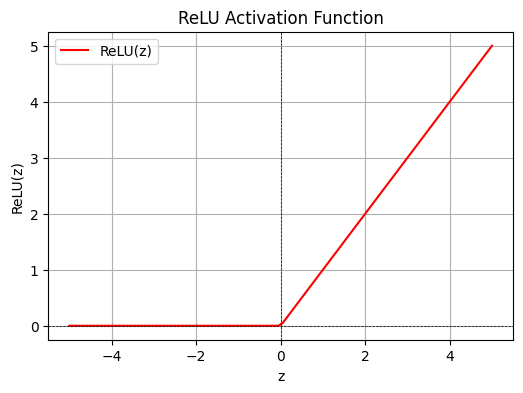

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input values
z = np.linspace(-5, 5, 100)
relu_values = np.maximum(0, z)

# Plot the ReLU function
plt.figure(figsize=(6,4))
plt.plot(z, relu_values, label="ReLU(z)", color="red")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.title("ReLU Activation Function")
plt.xlabel("z")
plt.ylabel("ReLU(z)")
plt.legend()
plt.grid()
plt.show()


**BPE**

**Fast Text**

In [3]:
!pip install fasttext
#!pip install git+https://github.com/facebookresearch/fastText.git


  Using cached fasttext-0.9.3.tar.gz (73 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313469 sha256=c1748159c8cce7f914e6cb4b36da017395553b288bcf685c3b94a71b5bcf4b09
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [5]:
import fasttext

# 1. Create a temporary text file with some sample data
text_data = """apple banana fruit apple banana orange fruit mango banana apple
               dog cat pet dog cat tiger lion elephant pet animal
               car bus vehicle car bus bike bicycle transport travel
               phone laptop computer phone laptop tablet gadget tech"""

with open("temp_corpus.txt", "w") as f:
    f.write(text_data)

# 2. Train FastText Skip-gram model
model = fasttext.train_unsupervised("temp_corpus.txt", model="skipgram", minCount=1, neg=5)

# 3. Get word vector for "apple"
vector_apple = model.get_word_vector("apple")

# 4. Find similar words to "apple"
nearest_words = model.get_nearest_neighbors("apple")

# 5. Print results
print("Word Vector for 'apple':", vector_apple[:5])  # Display first 5 dimensions
print("Similar words to 'apple':", nearest_words)



Word Vector for 'apple': [ 4.8668060e-04 -5.3762522e-04 -6.1046187e-05 -2.3233632e-04
  1.9145687e-05]
Similar words to 'apple': [(0.18128834664821625, 'bike'), (0.12936867773532867, 'computer'), (0.11369255185127258, 'vehicle'), (0.09258145838975906, 'car'), (0.07964383810758591, 'tiger'), (0.07948607206344604, 'dog'), (0.07764071226119995, 'travel'), (0.0757538452744484, 'tablet'), (0.047619905322790146, 'laptop'), (0.0392359159886837, '</s>')]
